In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
from scipy.stats import skew

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.shape

(1338, 7)

In [4]:
print(type('insurance'))

<class 'str'>


In [5]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
#insurance.dropna()
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
 #5 point summary of numerical attributes
insurance.describe(include="all")


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


The five-number summary involves the calculation of 5 summary statistical quantities: namely.

(1)Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
(2)1st Quartile: The 25th percentile.
(3)3rd Quartile: The 75th percentile.
(4)Minimum: The smallest observation in the sample.
(5)Maximum: The largest observation in the sample

In [9]:
 #Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
insurance1= insurance[['age','bmi','charges']]
insurance1.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


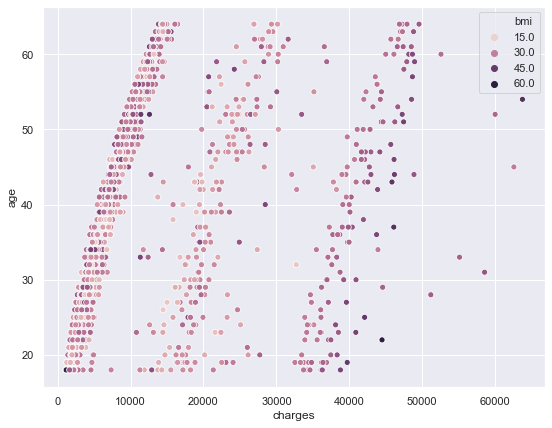

In [62]:
sns.scatterplot(x = 'charges', y ='age', data = insurance, hue = 'bmi')

In [10]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 
# skewness along the index axis 

insurance1.skew(axis = 0, skipna = True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [11]:
insurance1.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [12]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns
outliers = insurance1[insurance1['charges'] > insurance1['charges'].mean() + 3 * insurance1['charges'].std()]

In [13]:
outliers

,age,bmi,charges
34,28,36.400,51194.55914
543,54,47.410,63770.42801
577,31,38.095,58571.07448
819,33,35.530,55135.40209
1146,60,32.800,52590.82939
1230,52,34.485,60021.39897
1300,45,30.360,62592.87309


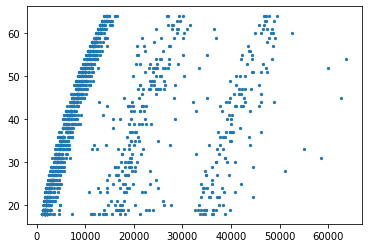

In [14]:
from matplotlib import pyplot as plt
plt.scatter(insurance1.charges,insurance1.age,5)

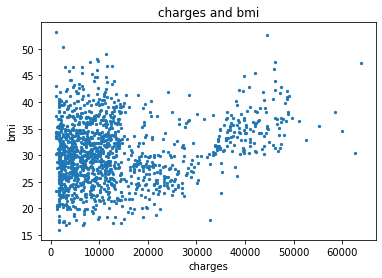

In [15]:
plt.scatter(insurance1.charges,insurance1.bmi,5)
plt.title('charges and bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

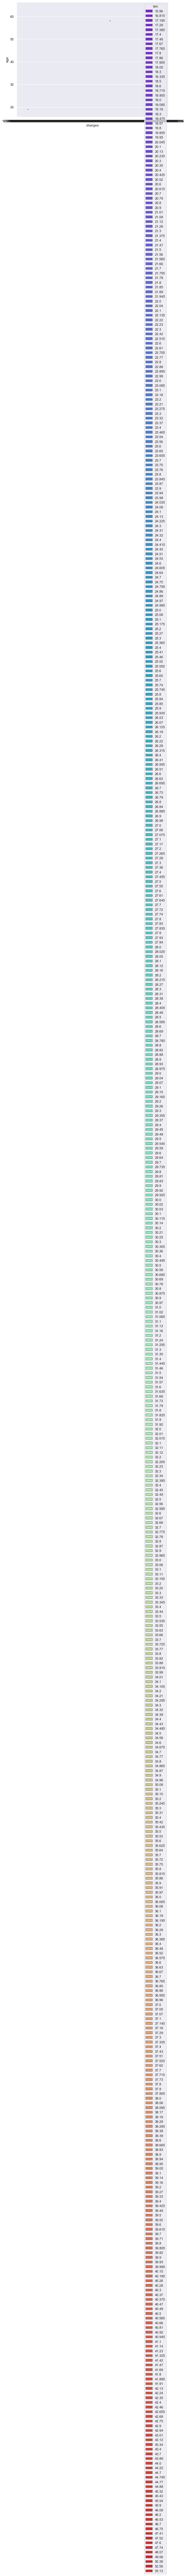

In [63]:
import seaborn as sns
sns.boxplot(x="charges", y="age",hue='bmi',data=insurance,palette='rainbow')

In [18]:
#Distribution of categorical columns (include  children) 

In [70]:
grouped = insurance.groupby(['age','bmi', 'charges'])
grouped.size()

age  bmi     charges     
18   15.960  1694.796400     1
     17.290  12829.455100    1
     20.790  1607.510100     1
     21.470  1702.455300     1
     21.565  13747.872350    1
     21.660  14283.459400    1
     21.780  11884.048580    1
     22.990  1704.568100     1
     23.085  1704.700150     1
     23.210  1121.873900     1
     23.320  1711.026800     1
     23.750  1705.624500     1
     24.090  2201.097100     1
     25.080  2196.473200     1
     25.175  15518.180250    1
     25.460  1708.001400     1
     26.125  1708.925750     1
     26.180  2304.002200     1
     26.315  2198.189850     1
     26.730  1615.766700     1
     27.280  18223.451200    1
     27.360  17178.682400    1
     28.215  2200.830850     1
     28.310  11272.331390    1
     28.500  1712.227000     1
     29.165  7323.734819     1
     29.370  1719.436300     1
     30.030  1720.353700     1
     30.115  2203.471850     1
             21344.846700    1
                            ..
63   35.200  

In [19]:
##(select_dtypes) function which we can use to build a new dataframe containing only the object columns.
#obj_insurance = insurance.select_dtypes(include=['object'])
#obj_insurance.head()

In [20]:
 #null values in the data
#obj_insurance[obj_insurance.isnull().any(axis=1)]    
#if there is any null value we need to fill null value
##########obj_insurance = obj_insurance.fillna({"nullcolumn name": "0"})

In [21]:
#insurance.astype('object').describe()

In [22]:
#insurance.describe(include = 'object')

In [23]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

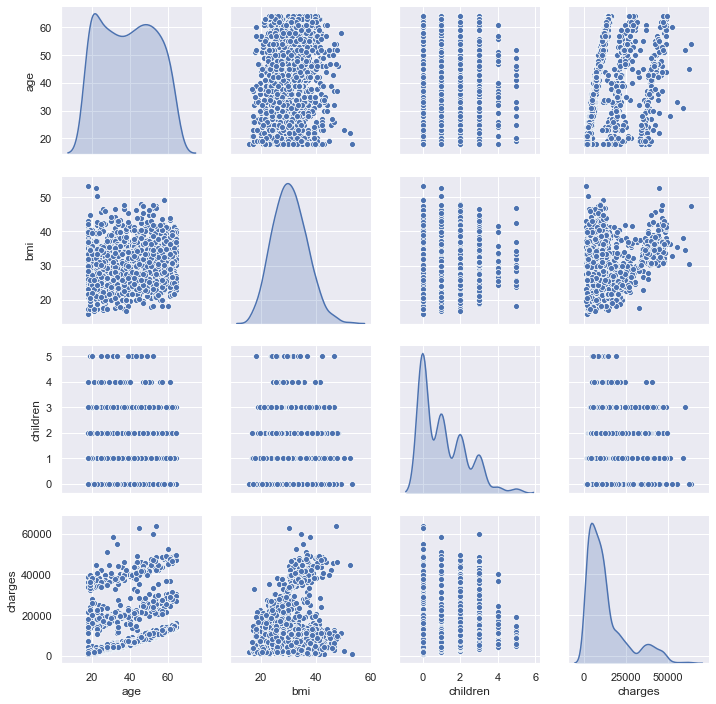

In [71]:
#Pair plot that includes all the columns of the data  frame
sns.pairplot(insurance,diag_kind='kde')

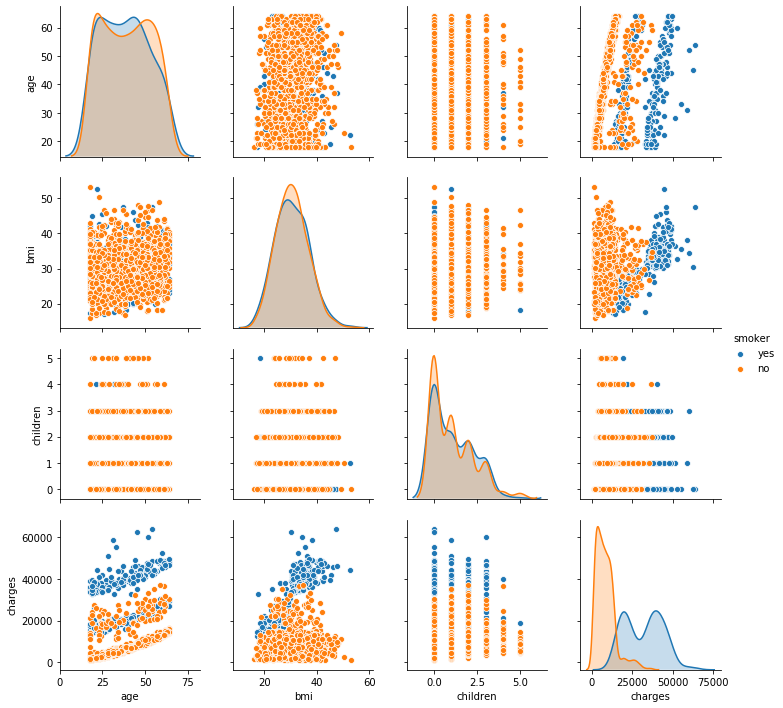

In [25]:
sns.pairplot(insurance,hue='smoker')

In [26]:
insurance.sex.unique()

array(['female', 'male'], dtype=object)

In [27]:
num_col = insurance.select_dtypes(include=np.number).columns
num_col

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [28]:
cat_col = insurance.select_dtypes(exclude=np.number).columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [29]:
cat_col = insurance.select_dtypes(include=['object'])
cat_col.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [30]:
# Let's see what's hidden under the 'object' label

insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [31]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [33]:
#. Do charges of people who smoke differ significantly  from the people who don't? 
insurance.groupby(["smoker"]).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [34]:
y = insurance[["smoker"]]
y.head()

,smoker
0,yes
1,no
2,no
3,no
4,no


In [35]:
y = pd.get_dummies(y, drop_first=True)

In [36]:
y.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [37]:
import numpy       as np
import scipy.stats as stats
smoker = np.array(y)

In [38]:
print(smoker.mean(), smoker.std())

0.20478325859491778 0.4035431520843401


H0:μ= 0
HA:μ> 0
    Here we select 
alpha= 0.05

In [39]:
import  scipy.stats  as stats  
t_statistic, p_value  =  stats.ttest_1samp(smoker, 0)
print('P Value %1.3f' %p_value) 

P Value 0.000


In [40]:
import  scipy.stats  as stats 
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
t_statistic, p_value = ttest_1samp(smoker, 0)
print(t_statistic, p_value)

[18.5553936] [1.43371188e-68]


In this example, p value is 0 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance

In [41]:
# 4(a) Does bmi of males differ significantly from that of  females

In [42]:
#insurance.groupby(["sex"]).count()

In [43]:
#x = insurance[["sex"]]


In [44]:
#x = pd.get_dummies(x, drop_first=True)


In [45]:
#insurance['sex '] = insurance.sex.astype(int) 

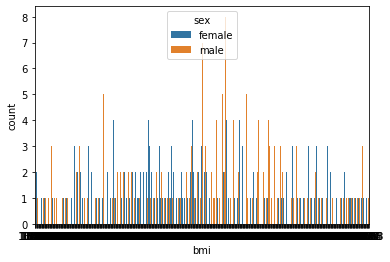

In [46]:
import matplotlib.pyplot as plt
sns.countplot('bmi',data=insurance,hue='sex')

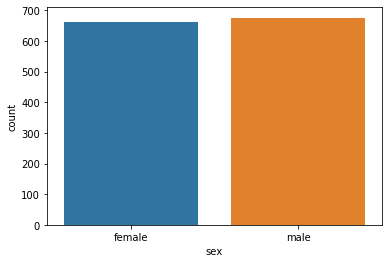

In [47]:
sns.countplot('sex',data=insurance)

In [48]:
male = insurance[insurance.sex== 'male']
male.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [49]:
male_bmi = male[['sex','bmi']]
male_bmi.head()

,sex,bmi
1,male,33.770
2,male,33.000
3,male,22.705
4,male,28.880
8,male,29.830


In [50]:
female = insurance[insurance.sex== 'female']
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [51]:
female_bmi = female[['sex','bmi']]
female_bmi.head()

,sex,bmi
0,female,27.90
5,female,25.74
6,female,33.44
7,female,27.74
9,female,25.84


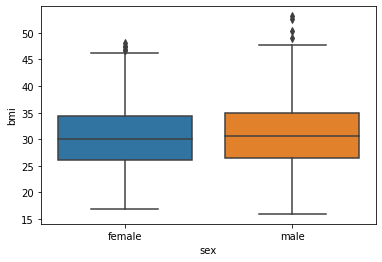

In [52]:
import seaborn as sns

sns.boxplot(x="sex", y="bmi", data=insurance)

from this plot bmi of males are  significantly higher than that of  females

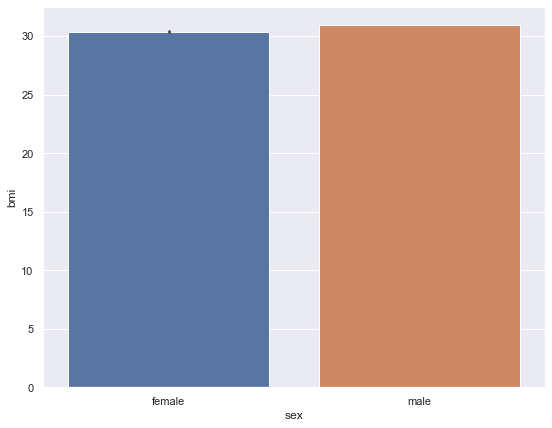

In [53]:
sns.set(rc={'figure.figsize':(9,7)})   ### sets the size of the plots


sns.barplot(x='sex',y='bmi',data=insurance,ci=.75)

In [54]:
### 4(c)Is the proportion of smokers significantly different  in different genders

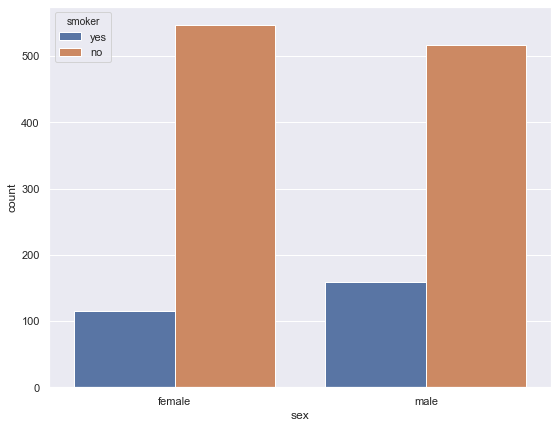

In [55]:
sns.countplot(x='sex',data=insurance,hue='smoker')


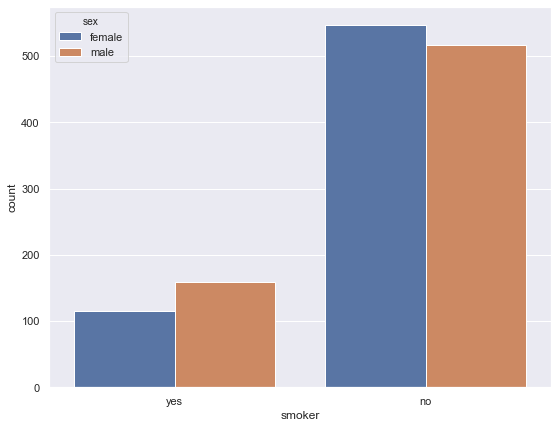

In [56]:
sns.countplot(x='smoker',data=insurance,hue='sex')


In [57]:
##4(d)Is the distribution of bmi across women with no  children, one child and two children, the same 

In [58]:
female = insurance[insurance.sex== 'female']
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [59]:
bmi_child= female[['bmi','children']]
bmi_child.head()

,bmi,children
0,27.90,0
5,25.74,0
6,33.44,1
7,27.74,3
9,25.84,0


In [60]:
female_child0 = bmi_child[bmi_child.children== 0]
print(female_child0.shape)
print('\n')
female_child1 = bmi_child[bmi_child.children== 1]
print(female_child1.shape)
print('\n')
female_child2 = bmi_child[bmi_child.children== 2]
print(female_child2.shape)

#female.groupby("children").count()   second method

(289, 2)


(158, 2)


(119, 2)


In [61]:
print(female_child0.mean(), female_child1.mean() , female_child2.mean())

bmi         30.361522
children     0.000000
dtype: float64 bmi         30.052658
children     1.000000
dtype: float64 bmi         30.64979
children     2.00000
dtype: float64


so the distribution of bmi across women with no  children, one child and two children are aprroximately  same...